In [19]:
import numpy as np
import pandas as pd
%matplotlib inline
import random
from pprint import pprint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import timeit
import matplotlib.pyplot as plt
from dtreefunctions import decision_tree_algorithm,decision_tree_predictions,train_test_split
from randomforestfunctions import random_forest_algorithm,random_forest_predictions

In [20]:
df = pd.read_csv("mammograph.csv",skipinitialspace=True)
df["label"] = df.Severity
df = df.drop("Severity", axis=1)
df = df.drop("BI-RADS_assessment", axis=1) #Removed -- Non predictive

column_names = []
for column in df.columns:
    name = column.replace("-", "_")
    column_names.append(name)
df.columns = column_names


In [21]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)


In [22]:
train_df.shape

(769, 5)

In [23]:
test_df.head()

,Age,Shape,Margin,Density,label
864,55,4,4,3,1
394,34,?,?,4,0
776,44,2,1,3,0
911,35,1,1,3,0
430,37,1,1,3,0


In [24]:
import timeit
tic=timeit.default_timer()
Accuracy = []
#x = [60,65,70,75,80,85,90,95,100,105,110,115]
i = 1
x = []
while i <= 60:
    forest = random_forest_algorithm(train_df, n_trees=i, n_bootstrap=20, n_features=5, dt_max_depth=999)
    try:
        print(i)
        predictions = random_forest_predictions(test_df, forest)
        Accuracy.append(accuracy_score(predictions, test_df.label))
        x.append(i)
        print(Accuracy)
    except AttributeError:
        print ("Error in tree", i)
    i = i+1   
        
toc=timeit.default_timer()
print(toc - tic)
print(x)

1
[0.5520833333333334]
2
[0.5520833333333334, 0.765625]
3
[0.5520833333333334, 0.765625, 0.765625]
4
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334]
5
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334, 0.8229166666666666]
6
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334, 0.8229166666666666, 0.8020833333333334]
7
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334, 0.8229166666666666, 0.8020833333333334, 0.8020833333333334]
8
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334, 0.8229166666666666, 0.8020833333333334, 0.8020833333333334, 0.765625]
9
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334, 0.8229166666666666, 0.8020833333333334, 0.8020833333333334, 0.765625, 0.796875]
10
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334, 0.8229166666666666, 0.8020833333333334, 0.8020833333333334, 0.765625, 0.796875, 0.7760416666666666]
11
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334, 0.8229166666666666, 0.802

33
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334, 0.8229166666666666, 0.8020833333333334, 0.8020833333333334, 0.765625, 0.796875, 0.7760416666666666, 0.78125, 0.8072916666666666, 0.8125, 0.7916666666666666, 0.8072916666666666, 0.796875, 0.8020833333333334, 0.7916666666666666, 0.8020833333333334, 0.8177083333333334, 0.7916666666666666, 0.8072916666666666, 0.7864583333333334, 0.78125, 0.796875, 0.8125, 0.8020833333333334, 0.8020833333333334, 0.7864583333333334, 0.8020833333333334, 0.8229166666666666, 0.8072916666666666, 0.8177083333333334]
34
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334, 0.8229166666666666, 0.8020833333333334, 0.8020833333333334, 0.765625, 0.796875, 0.7760416666666666, 0.78125, 0.8072916666666666, 0.8125, 0.7916666666666666, 0.8072916666666666, 0.796875, 0.8020833333333334, 0.7916666666666666, 0.8020833333333334, 0.8177083333333334, 0.7916666666666666, 0.8072916666666666, 0.7864583333333334, 0.78125, 0.796875, 0.8125, 0.8020833333333334, 0.80

46
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334, 0.8229166666666666, 0.8020833333333334, 0.8020833333333334, 0.765625, 0.796875, 0.7760416666666666, 0.78125, 0.8072916666666666, 0.8125, 0.7916666666666666, 0.8072916666666666, 0.796875, 0.8020833333333334, 0.7916666666666666, 0.8020833333333334, 0.8177083333333334, 0.7916666666666666, 0.8072916666666666, 0.7864583333333334, 0.78125, 0.796875, 0.8125, 0.8020833333333334, 0.8020833333333334, 0.7864583333333334, 0.8020833333333334, 0.8229166666666666, 0.8072916666666666, 0.8177083333333334, 0.828125, 0.8072916666666666, 0.8072916666666666, 0.828125, 0.8020833333333334, 0.8020833333333334, 0.7916666666666666, 0.8020833333333334, 0.8177083333333334, 0.8125, 0.8020833333333334, 0.8125, 0.8177083333333334]
47
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334, 0.8229166666666666, 0.8020833333333334, 0.8020833333333334, 0.765625, 0.796875, 0.7760416666666666, 0.78125, 0.8072916666666666, 0.8125, 0.7916666666666666, 0.807

56
[0.5520833333333334, 0.765625, 0.765625, 0.7083333333333334, 0.8229166666666666, 0.8020833333333334, 0.8020833333333334, 0.765625, 0.796875, 0.7760416666666666, 0.78125, 0.8072916666666666, 0.8125, 0.7916666666666666, 0.8072916666666666, 0.796875, 0.8020833333333334, 0.7916666666666666, 0.8020833333333334, 0.8177083333333334, 0.7916666666666666, 0.8072916666666666, 0.7864583333333334, 0.78125, 0.796875, 0.8125, 0.8020833333333334, 0.8020833333333334, 0.7864583333333334, 0.8020833333333334, 0.8229166666666666, 0.8072916666666666, 0.8177083333333334, 0.828125, 0.8072916666666666, 0.8072916666666666, 0.828125, 0.8020833333333334, 0.8020833333333334, 0.7916666666666666, 0.8020833333333334, 0.8177083333333334, 0.8125, 0.8020833333333334, 0.8125, 0.8177083333333334, 0.8125, 0.8177083333333334, 0.8020833333333334, 0.8072916666666666, 0.8020833333333334, 0.7916666666666666, 0.8072916666666666, 0.828125, 0.8072916666666666, 0.796875]
57
[0.5520833333333334, 0.765625, 0.765625, 0.708333333333

In [25]:
index_accuracies = np.arange(1,21)
column_name=["Accuracy"]
df_result = pd.DataFrame({'Accuracies':Accuracy})

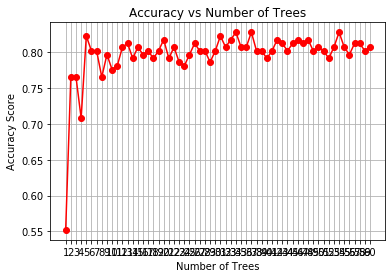

In [27]:
plt.plot(x,df_result["Accuracies"],'r',marker='o') # 'r' is the color red
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Number of Trees')
plt.grid(True)
plt.xticks(x)
plt.show()